In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 3.4/149.9 MB 19.4 MB/s eta 0:00:08
   - -------------------------------------- 4.7/149.9 MB 12.4 MB/s eta 0:00:12
   - -------------------------------------- 5.0/149.9 MB 10.4 MB/s eta 0:00:14
   - -------------------------------------- 5.2/149.9 MB 8.3 MB/s eta 0:00:18
   - -------------------------------------- 5.8/149.9 MB 5.6 MB/s eta 0:00:26
   - -------------------------------------- 6.0/149.9 MB 5.1 MB/s eta 0:00:28
   - -------------------------------------- 6.6/149.9 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 7.1/149.9 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 7.6/149.9 MB 4.2 MB/s eta 0:00:34
   -- ------------------------------------- 8.4/149.9 MB 4.2 MB/s eta 0:00:34
   -- ------------------------------------- 9.4/149.9 MB 4.2 MB/s eta 0:00:34
   -- ------------------------------------- 10.2/149.9 MB 4.2 MB/s e


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import pandas for data manipulation
import pandas as pd

# Load the dataset into a DataFrame
# Make sure the file name is correct
df = pd.read_csv(R'C:\Users\Nitin Kumar\Downloads\Customer Churn dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows to verify
print("The first 5 rows of the dataset:")
print(df.head())

The first 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7

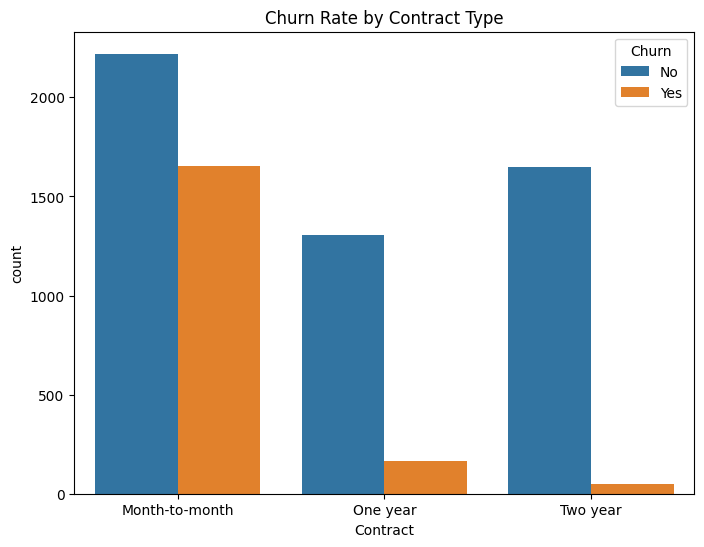

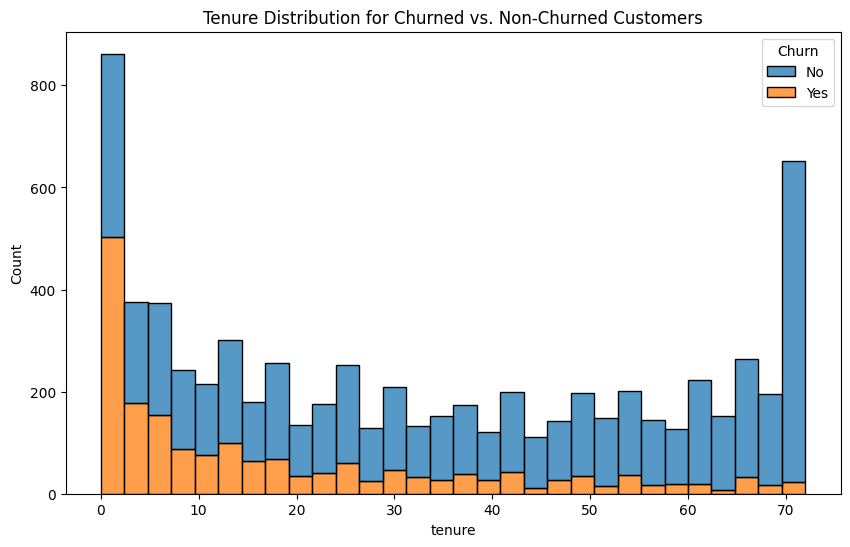

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Inspect data types
print("Data types and non-null values:")
print(df.info())
print("\n" + "="*50 + "\n")

# Analyze the target variable 'Churn'
print("Distribution of the target variable 'Churn':")
print(df['Churn'].value_counts())
print("\n" + "="*50 + "\n")

# You can start adding your visualizations here
import seaborn as sns
import matplotlib.pyplot as plt

# Example visualization: Churn by Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.show()

# Example visualization: Churn vs Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution for Churned vs. Non-Churned Customers')
plt.show()

In [4]:
# Import numpy for numerical operations
import numpy as np

# Task 1 & 2: Handle missing values and convert TotalCharges to numeric
# First, replace empty strings with NaN and then drop rows with NaNs
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df.dropna(inplace=True)
# Now convert the column to a numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Task 3a: Encode the 'Churn' target variable
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Task 3b: One-hot encode all other categorical columns
df_encoded = pd.get_dummies(df.drop('customerID', axis=1))

# Let's inspect the new dataframe to confirm the changes
print("Shape of the new encoded dataframe:", df_encoded.shape)
print("First 5 rows of the encoded dataframe:")
print(df_encoded.head())

Shape of the new encoded dataframe: (7032, 46)
First 5 rows of the encoded dataframe:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contr

C:\Users\Nitin Kumar\AppData\Local\Temp\ipykernel_28528\3706553198.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Task 1: Separate features (X) and target (y)
# The target variable is now the 'Churn' column, not 'Churn_Yes'
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Task 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Task 3 & 4: Train and Evaluate Models

# Logistic Regression
print("="*50)
print("Logistic Regression Model")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest
print("="*50)
print("Random Forest Model")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rand_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_rand_forest))

# XGBoost
print("="*50)
print("XGBoost Model")
# Note: For binary classification, use_label_encoder=False and eval_metric='logloss' are recommended for newer XGBoost versions
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Shape of X_train: (5625, 45)
Shape of X_test: (1407, 45)
Logistic Regression Model


C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7882018479033405
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest Model
Accuracy: 0.7775408670931059
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407

XGBoost Model
Accuracy: 0.7704335465529495
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54 

C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:00:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters.
# 'scoring' is set to 'f1' to optimize for the F1-score of the positive class.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score found: ", grid_search.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\n" + "="*50 + "\n")
print("Tuned Random Forest Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 300}
Best F1-score found:  0.5899301734210581


Tuned Random Forest Model Performance
Accuracy: 0.7967306325515281
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Top 10 Most Important Features:
                           Feature  Importance
1                           tenure    0.145074
3                     TotalCharges    0.119127
36         Contract_Month-to-month    0.108657
2                   MonthlyCharges    0.086293
18               OnlineSecurity_No    0.057577
16     InternetService_Fiber optic    0.049263
27                  TechSupport_No    0.044325
43  PaymentMethod_Electronic check    0.035186
38               Contract_Two year    0.027067
15             InternetService_DSL    0.019874


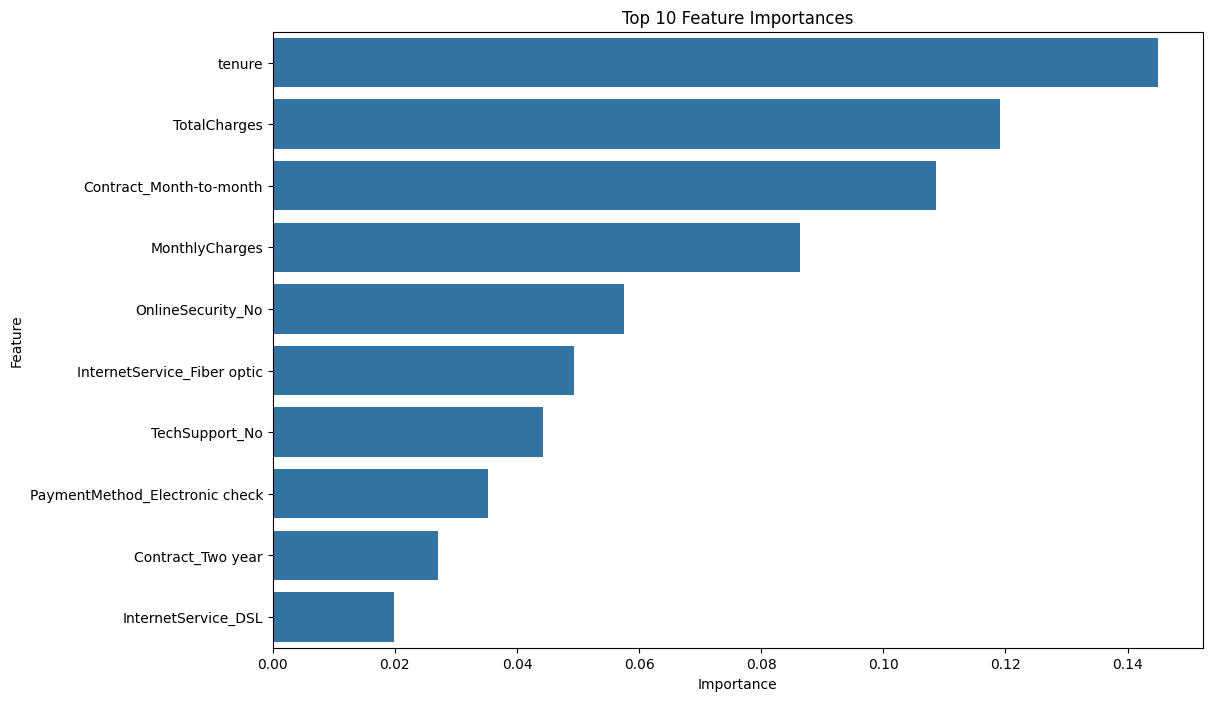

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [10]:
pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"SMOTE-resampled training set shape: {X_train_smote.shape}")
print("Class distribution after SMOTE:", y_train_smote.value_counts())

# Train a new Logistic Regression model on the balanced data
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

print("\n" + "="*50 + "\n")
print("Logistic Regression with SMOTE Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Original training set shape: (5625, 45)
SMOTE-resampled training set shape: (8260, 45)
Class distribution after SMOTE: Churn
1    4130
0    4130
Name: count, dtype: int64


Logistic Regression with SMOTE Performance
Accuracy: 0.7874911158493249
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.61      0.57      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



C:\Users\Nitin Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
